## 

# Projet: Examiner un ensemble de données - No show appointments

## Table of Contents




<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Conflit de données</a></li>
<li><a href="#wrangling">L'analyse exploratoire des données</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

## <a id='intro'></a>
## Introduction

### Dataset Description 

> <ul style="list-style : circle;">
    <li>
        <span style="font-weight : bold;">PatientId : </span>
        identification d'une patient sous traitement médical.
    </li>
    <li><span style="font-weight : bold;">AppointmentId : </span>identification rendez-vous.</li>
    <li>
        <span style="font-weight : bold;">Gender : </span>
        la construction socioculturelle des rôles masculins et féminins et des rapports entre les hommes 
        et les femmes
    </li>
    <li><span style="font-weight : bold;">ScheduledId : </span>journée aménagée ou planifiée selon un programme,
        emploi du temps du patient.
    </li>
    <li><span style="font-weight : bold;">AppointmenDay : </span>jour rendez-vous fixé à une heure précise ou date du patient.
    </li>
    <li><span style="font-weight : bold;">Age : </span>Durée écoulée entre la naissance d'une personne; moment de la vie correspondant à cette durée
    </li>
    <li><span style="font-weight : bold;">Neighbourhood : </span>un quartier où vivent les patients.</li>
    <li>
        <span style="font-weight : bold;">Scholarship : </span>
        études ou réalisations académiques ; apprendre à un haut niveau.
    </li>
    <li>
        <span style="font-weight : bold;">Hipertension : </span>
        L'hypertension est une élévation de la pression
        artérielle, en particulier de la pression diastolique.
    </li>
    <li>
        <span style="font-weight : bold;">Diabetes : </span>
        l'un de plusieurs troubles caractérisés par une augmentation de la production d'urine.
    </li>
    <li><span style="font-weight : bold;">Alcoholism : </span>addiction la consommation de boisson alcoolisée.</li>
    <li><span style="font-weight : bold;">Handcap : </span>patient avec un handicap physique ou mental.</li>
    <li><span style="font-weight : bold;">SMS_received : </span>Patient ayant un message.</li>
    <li><span style="font-weight : bold;">No-show : </span>patient arrive ou qui n'arrive à leur rendez-vous.</li>
  </ul>


### Questions d'analyse
> Son état de santé est-il une problèmes pour venir aux rendez-vous prévus?

In [1]:
# Importer paquets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# mise à jour pandas pour utilisé dataframe.explode() function. 
#!pip --upgrade install pandas==0.25.0

## <a id='wrangling'></a>
## Data Wrangling


### Les propriétés générales
> <ol>
    <li>Combien de ligne et colonne l'ensemble de donné ?</li>
    <li>Combien de valeur manquante l'ensemble de donné ?</li>
    <li>Est-ce qu'il y a de patient avoir trois maladie ?</li>
    <li>Combien des patients aucune des trois maladies ?</li>
  </ol>

In [3]:
# importation donnée
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Copie le donnée
show_df = df.copy()

In [5]:
# Affiche 5 premier ligne 
show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


1. Nombre de ligne et colonne

In [6]:
show_df.shape

(110527, 14)

In [7]:
# type ensembble de donné
show_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

 2. Nombre manquante

In [8]:
# Information sur l'ensemble de donnée
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


3. Voir les nombres de patient présentent 3 maladies

In [9]:
# patient porte 3 maladies et handicap
df_porte = show_df.query('Hipertension == 1 & Diabetes == 1 & Alcoholism == 1 & Handcap == 1')

# Nombre de ligne c'est le nombre de patient porte 3 maladie et handicap
df_porte.shape

(12, 14)

4. Nombre d'une patient ne présente leur maladie

In [10]:
# nombre d'une patient aucune de cette maladie et non pas handicap
df_auc = show_df.query('Hipertension == 0 & Diabetes == 0 & Alcoholism == 0')
# Nombre de ligne c'est le nombre de patient aucune 3 maladie et non pas handicap
df_auc.shape

(85312, 14)

5. Nombre de patient avoir au moins une maladie

In [11]:
# Patient avoir une ou plusieur maladie
df_avoir = show_df.query('Hipertension == 1 or Diabetes == 1 or Alcoholism == 1')
df_avoir

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z,45,BENTO FERREIRA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110483,1.642781e+12,5769404,F,2016-06-03T08:47:58Z,2016-06-03T00:00:00Z,60,PRAIA DO CANTO,0,1,0,0,0,0,No
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110499,8.219692e+14,5757697,F,2016-06-01T09:42:56Z,2016-06-01T00:00:00Z,66,MARIA ORTIZ,0,1,1,0,0,0,No


## Nettoyage des données
> <ol>
    <li>Renommer colonne </li>
    <li>Convertir header columns to lowercase</li>
    <li>Convertir le type de l'ensemble de donnée</li>
  </ol>
 

1. Renommer les colonnes suivant : Hipertension,Handcap, SMS_received, No-show

In [12]:
# Renommer colonne
show_df = show_df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','SMS_received':'Smsreceived', 'No-show': 'Noshow'})
# confirme modification
show_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Smsreceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


2. Convertir l' entête des colonne en miniscule

In [13]:
# Convertir colonne en miniscule
show_df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# Confirme la modification
show_df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Je fais convertir le colonne en miniscule

3. Convertir la type de quelques ensemble de donnée

In [14]:
# convertir type ensemble de donnée
show_df.scheduledday = pd.to_datetime(show_df.scheduledday).dt.date.astype('datetime64[ns]')
# confirme
show_df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
# Convertir le type appointmentday vers datetime
show_df.appointmentday = show_df.appointmentday.astype('datetime64[ns]')
# confirme
show_df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


On cherche l'age minimum 

In [16]:
show_df.age.min()

-1

J'utilise query pour chrercher l'âge inférieur Zéro

In [17]:
show_df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Supprime l'âge inférieur zéro car n'est valable

In [18]:
show_df.drop(show_df[show_df.age < 0].index,inplace=True)
show_df.age.min()

0

In [19]:
# Confirmé
show_df.age.min()

0

##### <a id='eda'></a>
## L'analyse exploratoire des données

> <ol>
    <li>Histogram des ensembles de données</li>
    <li>Diagramme circulaire pour les trois maladies</li>
  </ol>


###  Quelle est la maladie qui a infecté beaucoup de patients ?

>Histogramme des ensembles de données

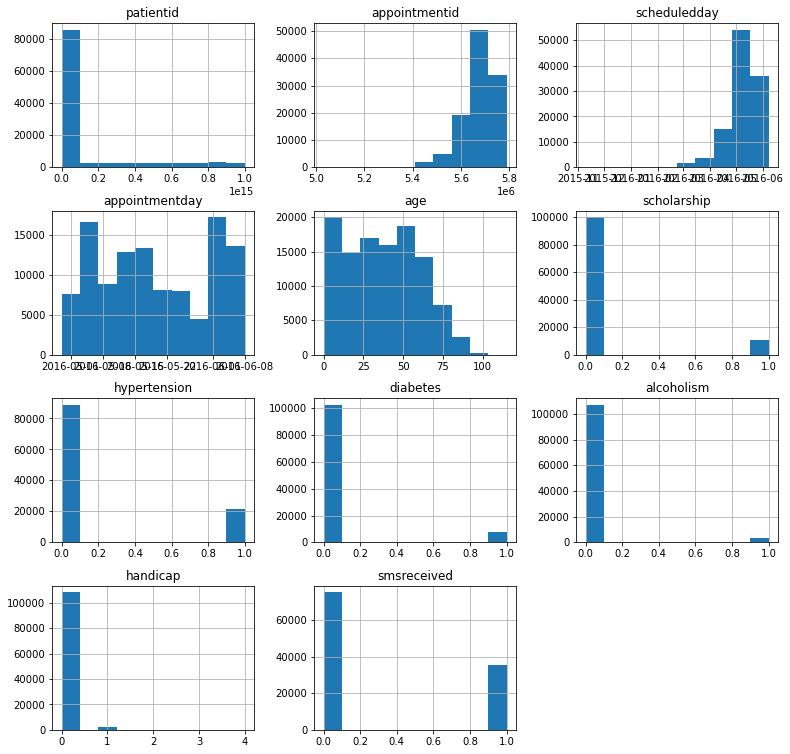

In [20]:
#figsize = (width = 13, height = 10)
show_df.hist(figsize = (13,13));

## Fonction pour diagramme circulaire
On fait le diagramme circulaire pour voir le pourcentage des patients porte ou aucune de maladie 
>pnd : patient n'a pas de cette maladie; 

>pilm : patient il y a maladie;

>nbr1 : nombre d'une patient qui n'a pas de maladie; 

>nbr2 : patient il y a de maladie;

>titre : Titre maladie de patient.

In [21]:
def circle(pnd,pilm,nbr1,nbr2,titre):
    maladie = [pnd,pilm]
    nombre = [nbr1,nbr2]
    figsize = (13,10)
    plt.title(titre, color='b', fontsize=25)
    plt.pie(x=nombre, labels= maladie, autopct ='%.0f%%')
    plt.show()

### Cherche le nombre de patient il n'y a pas de maladie et le patient il y a de maladie avec value_counts() pour faire le diagramme circulaire

1.Hypertation

In [22]:
# nombre patients porte et aucune de cette maladie
show_df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

2. Diabetes 

In [23]:
# nombre patients porte et aucune de cette maladie
show_df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

3. Alcoholism

In [24]:
# nombre patients porte et aucune de cette maladie
show_df.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

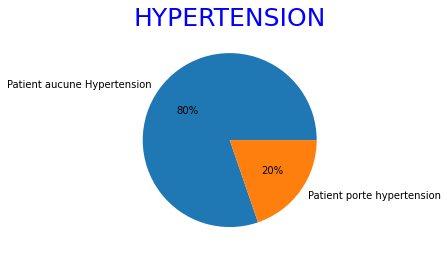

In [25]:
circle('Patient aucune Hypertension','Patient porte hypertension',88725,21801, 'HYPERTENSION')

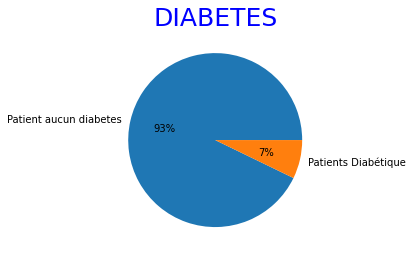

In [26]:
circle('Patient aucun diabetes','Patients Diabétique',102584,7943, 'DIABETES')

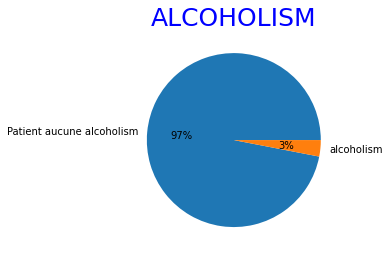

In [27]:
circle('Patient aucune alcoholism','alcoholism',107167,3360, 'ALCOHOLISM')

## Voir le nombre de patient manque leur rendez-vous

###### 1.  21801 nombre de patient hypertention

In [28]:
show_df.query('hypertension == 1 & noshow=="No"')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110471,3.187119e+14,5781360,F,2016-06-07,2016-06-07,84,RESISTÊNCIA,0,1,0,0,0,0,No
110475,2.123885e+14,5779726,F,2016-06-07,2016-06-07,54,RESISTÊNCIA,0,1,0,0,0,0,No
110476,9.278752e+12,5678369,F,2016-05-10,2016-06-06,80,RESISTÊNCIA,0,1,0,0,0,1,No
110483,1.642781e+12,5769404,F,2016-06-03,2016-06-03,60,PRAIA DO CANTO,0,1,0,0,0,0,No


##### 2. 7943 nombre de patient diabetiques

In [29]:
show_df.query('diabetes == 1 & noshow=="No"')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,7.298459e+13,5637975,F,2016-04-29,2016-04-29,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,1.578132e+12,5637986,F,2016-04-29,2016-04-29,64,TABUAZEIRO,1,1,1,0,0,0,No
41,8.224325e+14,5633339,F,2016-04-28,2016-04-29,71,MARUÍPE,0,0,1,0,0,0,No
47,5.894585e+11,5633116,F,2016-04-28,2016-04-29,39,MARUÍPE,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110448,2.629184e+14,5756082,F,2016-06-01,2016-06-06,40,RESISTÊNCIA,0,1,1,0,0,1,No
110456,4.994742e+12,5772107,F,2016-06-03,2016-06-03,79,RESISTÊNCIA,0,1,1,0,0,0,No
110468,3.227475e+11,5763322,F,2016-06-02,2016-06-07,76,RESISTÊNCIA,0,1,1,0,0,1,No
110477,2.798494e+13,5673472,F,2016-05-09,2016-06-06,67,RESISTÊNCIA,0,0,1,0,0,1,No


##### 3.  3360 nombre de patient alcoholism

In [30]:
show_df.query('alcoholism == 1 & noshow=="No"')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
133,3.587186e+12,5580520,M,2016-04-14,2016-04-29,69,PRAIA DO SUÁ,0,0,1,1,0,0,No
186,7.329661e+13,5587737,M,2016-04-15,2016-04-29,66,REDENÇÃO,0,1,0,1,0,0,No
207,6.359796e+13,5642700,M,2016-04-29,2016-04-29,46,MARUÍPE,0,0,0,1,0,0,No
331,8.218631e+11,5639649,F,2016-04-29,2016-04-29,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109912,3.486968e+12,5755218,M,2016-06-01,2016-06-03,56,BONFIM,0,1,1,1,0,0,No
109947,8.126729e+13,5748881,M,2016-05-31,2016-06-02,62,RESISTÊNCIA,0,0,1,1,0,0,No
110071,9.648483e+13,5758772,M,2016-06-01,2016-06-06,54,BONFIM,0,1,0,1,0,1,No
110167,9.733160e+11,5756807,M,2016-06-01,2016-06-03,64,BOA VISTA,0,0,0,1,0,0,No


### Quel est l'âge moyenne d'une patient qui n'arrive au rendez-vous?

On va chercher d'abord combien de patient arrive au rendez-vous

In [31]:
show_df = show_df.query('hypertension == 1 or diabetes == 1 or alcoholism == 1')

In [32]:
absent = show_df.query('noshow=="No"')
absent

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110475,2.123885e+14,5779726,F,2016-06-07,2016-06-07,54,RESISTÊNCIA,0,1,0,0,0,0,No
110476,9.278752e+12,5678369,F,2016-05-10,2016-06-06,80,RESISTÊNCIA,0,1,0,0,0,1,No
110477,2.798494e+13,5673472,F,2016-05-09,2016-06-06,67,RESISTÊNCIA,0,0,1,0,0,1,No
110483,1.642781e+12,5769404,F,2016-06-03,2016-06-03,60,PRAIA DO CANTO,0,1,0,0,0,0,No


In [33]:
absent.age.mean()

59.352995080544034

## Répresentation histogramme Age

In [34]:
# Histogram for age using Matplotlib
def age_patient() :
    plt.figure(figsize=(6,4))
    plt.hist(show_df.age, color='g', bins=30)
    plt.title('AGE', color='g')
    plt.xlabel('AGE OF PATIENT', color='g')
    plt.ylabel('NUBER OF PATIENT', color='g')
    plt.show()

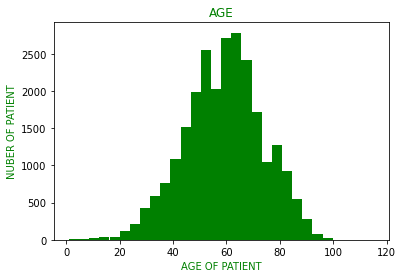

In [35]:
age_patient()

In [43]:
# Histogram for age using Seaborn
def age():
    plt.figure(figsize=(6,4))
    sns.histplot(show_df.age, bins=30)
    plt.title('AGE OF PATIENT', color='b')
    plt.xlabel('AGE OF PATIENT', color='b')
    plt.ylabel('NUBER OF PATIENT', color='b')
    plt.show()

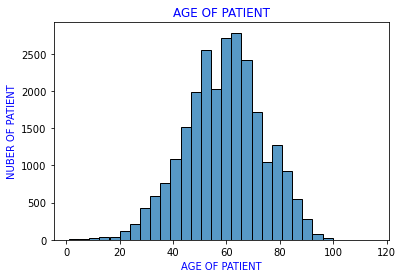

In [44]:
age()

## Diagramme d'une âge des patients présent et absent sur rendez-vous 

In [37]:
# absent = show_df.query('noshow=="No"') : nombre des patient absent au rendez-vous 
absent

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
25,5.819370e+12,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No
26,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110475,2.123885e+14,5779726,F,2016-06-07,2016-06-07,54,RESISTÊNCIA,0,1,0,0,0,0,No
110476,9.278752e+12,5678369,F,2016-05-10,2016-06-06,80,RESISTÊNCIA,0,1,0,0,0,1,No
110477,2.798494e+13,5673472,F,2016-05-09,2016-06-06,67,RESISTÊNCIA,0,0,1,0,0,1,No
110483,1.642781e+12,5769404,F,2016-06-03,2016-06-03,60,PRAIA DO CANTO,0,1,0,0,0,0,No


In [38]:
# Les patient present lors d'une rendez-vous
present = show_df.query('noshow == "Yes"')
present

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
44,2.741649e+11,5635414,F,2016-04-28,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
126,9.447582e+14,5633576,F,2016-04-28,2016-04-29,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes
131,4.755938e+13,5637150,M,2016-04-28,2016-04-29,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes
212,4.266984e+14,5642059,M,2016-04-29,2016-04-29,62,SANTOS DUMONT,0,1,1,0,0,0,Yes
270,8.617228e+12,5620528,F,2016-04-26,2016-04-29,45,CARATOÍRA,1,1,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110386,2.957279e+12,5582576,F,2016-04-14,2016-06-01,48,RESISTÊNCIA,0,1,0,0,0,1,Yes
110399,9.437123e+13,5692938,F,2016-05-12,2016-06-07,17,RESISTÊNCIA,0,1,0,0,0,1,Yes
110492,6.456342e+14,5786741,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,Yes


Statistiques descriptives

In [39]:
absent.age.describe()

count    20734.000000
mean        59.352995
std         14.367270
min          2.000000
25%         50.000000
50%         60.000000
75%         69.000000
max        115.000000
Name: age, dtype: float64

In [40]:
present.age.describe()

count    4481.000000
mean       57.364204
std        15.478612
min         1.000000
25%        48.000000
50%        57.000000
75%        68.000000
max        98.000000
Name: age, dtype: float64

In [46]:
# Histogramme d'âge de patient
def patientsante():
    absent.age.hist(color = 'darkblue', bins=30, label="ABSENT")
    present.age.hist(color = 'orange',bins=30,  label="PRESENT")
    plt.legend();
    plt.title("HISTOGRAMME D'UNE AGE (PATIENT PRESENT ET ABSENT)")
    plt.xlabel("Age du patient")
    plt.ylabel("Nombre des patient");
    plt.savefig('noshow.png')
    plt.show()

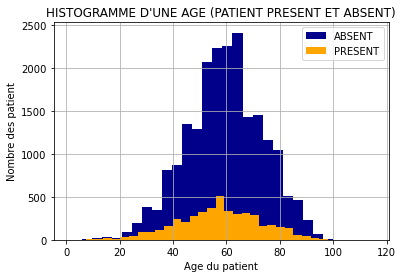

In [47]:
patientsante()

La plupart des patient ne sont pas présent au rendez-vous. L'âge moyenne d'une patient présent est 57 ans et les absent est 59 ans

## <a id='conclusions'></a>
## Conclusions

>La santé de patient à l'origine de manque rendez-vous, peut-être il souffre beaucoup à date de rendez-vous.
Il y a 12 patients porte trois maladie et Handicap, 84115 patients aucune de trois maladie et n'ont pas handicap

>59 ans l'âge moyenne de patient qui n'arrive au rendez-vous, il peut oublié la date ou heure. 


## Limite

84115 personnes enreigistres sans maladie et ils n'ont pas handicap donc il y a d'erreur sur cette donnée.

In [42]:
# Convert to html
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])